# Pandas Data Analysis

## Imports

Import `pandas` and `numpy` into the notebook.

In [605]:
import pandas as pd
import numpy as np

## Loading data

In [606]:
df = pd.read_csv('./data.csv')
df

,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4.0,1-Jan-17,John
1,1.99,-999.0,15-Mar-17,John
2,9.99,1.0,20-Apr-17,Rick
3,19.99,NaN,23-Jun-17,Mary
4,0.99,7.0,12-Dec-17,Mary
5,2.99,3.0,NaN,Rick
6,9.99,1.0,20-Apr-17,Rick


The [`head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) method of our data frame returns the top 5 items. This can take a parameter for the number of items you want returned.

In [608]:
df.head(3)

,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4.0,1-Jan-17,John
1,1.99,-999.0,15-Mar-17,John
2,9.99,1.0,20-Apr-17,Rick


The `tail` method does the opposite and returns the last 5 items. It can also take in a parameter for the number of items you want returned.

In [609]:
df.tail(2)

,Item Price,Items Sold,Order Date,Sales Person
5,2.99,3.0,NaN,Rick
6,9.99,1.0,20-Apr-17,Rick


The [`copy`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.copy.html) method returns a new data frame as a copy. This is useful to have a copy of the original data frame around in case you need to revert back to it.

In [610]:
df_original = df.copy()
df_original

,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4.0,1-Jan-17,John
1,1.99,-999.0,15-Mar-17,John
2,9.99,1.0,20-Apr-17,Rick
3,19.99,NaN,23-Jun-17,Mary
4,0.99,7.0,12-Dec-17,Mary
5,2.99,3.0,NaN,Rick
6,9.99,1.0,20-Apr-17,Rick


### Read methods

Often you'll be reading in data from the web or from a local file. The `pd.read_*` methods can read in all sorts of data. The two most popular ones you'll use are [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) and [`pd.read_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html).

To look at any documentation on a method, type a `?` at the end of it - `pd.read_table?`, or put the cursor on the method you want to see the documentation for and hit `Shift+Tab`.

Other read functions are:
- [`read_clipboard`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_clipboard.html#pandas.read_clipboard) - Pandas will read in whatever is in the clipboard. Useful for when copying tables from a web page.
- [`read_JSON`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html#pandas.read_json) - Read JSON strings, files, or web calls. Very useful for API calls to get data.
- [`read_HTML`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html#pandas.read_html) - Read in HTML. Mainly used for web scraping. *Note: The [beautifulsoup](https://www.crummy.com/software/BeautifulSoup/) package is required for this as it uses its APIs.*
- [`read_excel`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html#pandas.read_excel) - Similar to reading an CSV, this reads an Excel spreadsheet and can specify what sheet to read in.

Many more ways to read in data can be found at the [API reference page](https://pandas.pydata.org/pandas-docs/stable/api.html#input-output).

In [ ]:
df.to_

Also, there are methods to write to any of these types of files. They can be accessed on the `DataFrame` or `Series` object itself.

### Value types

All values in a `DataFrame` or `Series` is of `ndarray` from `numpy`.

In [611]:
print(df.values)
type(df.values)

[[4.99 4.0 '1-Jan-17' 'John']
 [1.99 -999.0 '15-Mar-17' 'John']
 [9.99 1.0 '20-Apr-17' 'Rick']
 [19.99 nan '23-Jun-17' 'Mary']
 [0.99 7.0 '12-Dec-17' 'Mary']
 [2.99 3.0 nan 'Rick']
 [9.99 1.0 '20-Apr-17' 'Rick']]


numpy.ndarray

Even the values in a single row are of type `ndarray`.

In [612]:
print(df.values[0])
type(df.values[0])

[4.99 4.0 '1-Jan-17' 'John']


numpy.ndarray

## Handling missing and duplicate data

In [613]:
df.head()

,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4.0,1-Jan-17,John
1,1.99,-999.0,15-Mar-17,John
2,9.99,1.0,20-Apr-17,Rick
3,19.99,NaN,23-Jun-17,Mary
4,0.99,7.0,12-Dec-17,Mary


First, let's handle the `-999` with the `replace` method.

In [614]:
df = df.replace(-999, 9)
df

,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4.0,1-Jan-17,John
1,1.99,9.0,15-Mar-17,John
2,9.99,1.0,20-Apr-17,Rick
3,19.99,NaN,23-Jun-17,Mary
4,0.99,7.0,12-Dec-17,Mary
5,2.99,3.0,NaN,Rick
6,9.99,1.0,20-Apr-17,Rick


Now, let's find if there are any missing values in our data frame.

In [615]:
df.isnull().values.any()

True

There is missing data - denoted by `NaN`.

Now we are selecting what rows have any values that are considered null by pandas - `NaN` and `None` are both selected. The `axis=1` parameter tells the `any` method to look at rows instead of columns.

In [617]:
df[df.isnull().any(axis='columns')]

,Item Price,Items Sold,Order Date,Sales Person
3,19.99,NaN,23-Jun-17,Mary
5,2.99,3.0,NaN,Rick


We can do a boolean selection within our data frame to access our data. For example, if I want to find, within my data frame, all the rows in which the "Item Sold" row is less than five:

In [618]:
df["Items Sold"] < 5

0     True
1    False
2     True
3    False
4    False
5     True
6     True
Name: Items Sold, dtype: bool

In [619]:
df[df["Items Sold"] < 5]

,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4.0,1-Jan-17,John
2,9.99,1.0,20-Apr-17,Rick
5,2.99,3.0,NaN,Rick
6,9.99,1.0,20-Apr-17,Rick


#### Fix missing data

There are two main ways to deal with missing data:
- Drop the rows or columns entirely.
- Fill in missing data with another value.

Dropping is ok if there are only a very small percentage of items that to be dropped compared to the entire data set, but if that's not the case then filling in the values would be the best option.

You can drop all missing data with the [`df.dropna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) function.

In [620]:
df.dropna()

,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4.0,1-Jan-17,John
1,1.99,9.0,15-Mar-17,John
2,9.99,1.0,20-Apr-17,Rick
4,0.99,7.0,12-Dec-17,Mary
6,9.99,1.0,20-Apr-17,Rick


Filling in values for missing data can be tricky, but there are a few things you can do. You can pick the mean (average), median (middle), or most used values. Depending on the data, having a good foundation in the business knowledge really helps in this case.

Here I'm using the mean to fill in my missing data. Note the `inplace=True` here instead of setting the data frame equal to the results like in the previous cells.

In [621]:
df["Items Sold"].fillna(round(df["Items Sold"].mean(), 0), inplace=True)
df["Order Date"].fillna("July 25, 2017", inplace=True)
df

,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4.0,1-Jan-17,John
1,1.99,9.0,15-Mar-17,John
2,9.99,1.0,20-Apr-17,Rick
3,19.99,4.0,23-Jun-17,Mary
4,0.99,7.0,12-Dec-17,Mary
5,2.99,3.0,"July 25, 2017",Rick
6,9.99,1.0,20-Apr-17,Rick


#### Duplicates

`pandas` also has some great support for finding duplicate rows and to drop them.

For a boolean array of items that are duplicates just call the `df.duplicated` function.

In [622]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

We can use that as a boolean mask to filter items from our data frame.

In [623]:
df[df.duplicated()]

,Item Price,Items Sold,Order Date,Sales Person
6,9.99,1.0,20-Apr-17,Rick


To show all items, including the first instance of the duplicate, put the `keep` parameter to `False`.

In [624]:
df[df.duplicated(keep=False)]

,Item Price,Items Sold,Order Date,Sales Person
2,9.99,1.0,20-Apr-17,Rick
6,9.99,1.0,20-Apr-17,Rick


We can then use the `drop_duplicates` function to drop all duplicates from our data frame.

In [625]:
df = df.drop_duplicates()
df

,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4.0,1-Jan-17,John
1,1.99,9.0,15-Mar-17,John
2,9.99,1.0,20-Apr-17,Rick
3,19.99,4.0,23-Jun-17,Mary
4,0.99,7.0,12-Dec-17,Mary
5,2.99,3.0,"July 25, 2017",Rick


### Change Column Types

Sometimes, the data will be imported as a `string`, which `pandas` will create as an `object` type.

In [626]:
df.dtypes

Item Price      float64
Items Sold      float64
Order Date       object
Sales Person     object
dtype: object

We can convert types of columns pretty easy. For dates, `pandas` offers us a very convenient [`to_datetime`](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html) method.

In [627]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4.0,2017-01-01,John
1,1.99,9.0,2017-03-15,John
2,9.99,1.0,2017-04-20,Rick
3,19.99,4.0,2017-06-23,Mary
4,0.99,7.0,2017-12-12,Mary
5,2.99,3.0,2017-07-25,Rick


For other types, we can call the [`astype`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html) method and specify the type we want to convert to.

In [628]:
df["Items Sold"] = df["Items Sold"].astype(int)
df

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4,2017-01-01,John
1,1.99,9,2017-03-15,John
2,9.99,1,2017-04-20,Rick
3,19.99,4,2017-06-23,Mary
4,0.99,7,2017-12-12,Mary
5,2.99,3,2017-07-25,Rick


We can call the `info` method on the data frame to get an idea on the data types.

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 4 columns):
Item Price      6 non-null float64
Items Sold      6 non-null int32
Order Date      6 non-null datetime64[ns]
Sales Person    6 non-null object
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 216.0+ bytes


## Working with Data

### Grouping

The [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) method groups by a column or a list of columns. Doing a `groupby` on its own will result in returning a `DataFrameGroupBy` object. In order to show the data frame an aggregation on the grouping must be made.

In [632]:
df.groupby("Sales Person").sum()

,Item Price,Items Sold
Sales Person,,
John,6.98,13
Mary,20.98,11
Rick,12.98,4


We can call `sort_values` after grouping to sort by a specific column. To sort by descending set the `ascending` to `False`.

In [633]:
df.groupby("Sales Person").sum().sort_values("Item Price", ascending=False)

,Item Price,Items Sold
Sales Person,,
Mary,20.98,11
Rick,12.98,4
John,6.98,13


Or you can group by multiple columns since `pandas` has the ability to use [multiple indexes]().

In [634]:
df_grouped = df.groupby(["Sales Person", "Order Date"]).sum()
print(df_grouped.index)
df_grouped

MultiIndex(levels=[['John', 'Mary', 'Rick'], [2017-01-01 00:00:00, 2017-03-15 00:00:00, 2017-04-20 00:00:00, 2017-06-23 00:00:00, 2017-07-25 00:00:00, 2017-12-12 00:00:00]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 3, 5, 2, 4]],
           names=['Sales Person', 'Order Date'])


Item Price  Items Sold
Sales Person Order Date                        
John         2017-01-01        4.99           4
             2017-03-15        1.99           9
Mary         2017-06-23       19.99           4
             2017-12-12        0.99           7
Rick         2017-04-20        9.99           1
             2017-07-25        2.99           3

### Concatenating

If you have more than one source of the same type of data, the [`concat`]() operation will append the "new" data to the "old" data into a single data frame.

In [635]:
df2 = pd.DataFrame({"Order Date": ["December 22, 2017"],
                   "Sales Person": ["Mary"],
                   "Items Sold": 12,
                   "Item Price": 9.99})
df2

,Item Price,Items Sold,Order Date,Sales Person
0,9.99,12,"December 22, 2017",Mary


The `concat` method takes in a list of data frames to concatenate together.

In [636]:
df = pd.concat([df, df2])
df

,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4,2017-01-01 00:00:00,John
1,1.99,9,2017-03-15 00:00:00,John
2,9.99,1,2017-04-20 00:00:00,Rick
3,19.99,4,2017-06-23 00:00:00,Mary
4,0.99,7,2017-12-12 00:00:00,Mary
5,2.99,3,2017-07-25 00:00:00,Rick
0,9.99,12,"December 22, 2017",Mary


Now the second data frame has been added on to the original. However, this keeps the index of the second data frame when it adds to the first. We can fix this with the `reset_index` method.

In [637]:
df = df.reset_index(drop=True)
df

,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4,2017-01-01 00:00:00,John
1,1.99,9,2017-03-15 00:00:00,John
2,9.99,1,2017-04-20 00:00:00,Rick
3,19.99,4,2017-06-23 00:00:00,Mary
4,0.99,7,2017-12-12 00:00:00,Mary
5,2.99,3,2017-07-25 00:00:00,Rick
6,9.99,12,"December 22, 2017",Mary


### Creating Calculated Columns

In [638]:
df.head()

,Item Price,Items Sold,Order Date,Sales Person
0,4.99,4,2017-01-01 00:00:00,John
1,1.99,9,2017-03-15 00:00:00,John
2,9.99,1,2017-04-20 00:00:00,Rick
3,19.99,4,2017-06-23 00:00:00,Mary
4,0.99,7,2017-12-12 00:00:00,Mary


In [639]:
df['Total Price'] = df['Item Price'] * df['Items Sold']
df

,Item Price,Items Sold,Order Date,Sales Person,Total Price
0,4.99,4,2017-01-01 00:00:00,John,19.96
1,1.99,9,2017-03-15 00:00:00,John,17.91
2,9.99,1,2017-04-20 00:00:00,Rick,9.99
3,19.99,4,2017-06-23 00:00:00,Mary,79.96
4,0.99,7,2017-12-12 00:00:00,Mary,6.93
5,2.99,3,2017-07-25 00:00:00,Rick,8.97
6,9.99,12,"December 22, 2017",Mary,119.88


### Dummy Variables

From statistics, [dummy variables]() are variables that represent categorical variables as numbers.

With no parameters, it produces dummy variables on all objects with a type of `object` and `cateogry`.

In [640]:
pd.get_dummies(df)

,Item Price,Items Sold,Total Price,Order Date_2017-01-01 00:00:00,Order Date_2017-03-15 00:00:00,Order Date_2017-04-20 00:00:00,Order Date_2017-06-23 00:00:00,Order Date_2017-07-25 00:00:00,Order Date_2017-12-12 00:00:00,"Order Date_December 22, 2017",Sales Person_John,Sales Person_Mary,Sales Person_Rick
0,4.99,4,19.96,1,0,0,0,0,0,0,1,0,0
1,1.99,9,17.91,0,1,0,0,0,0,0,1,0,0
2,9.99,1,9.99,0,0,1,0,0,0,0,0,0,1
3,19.99,4,79.96,0,0,0,1,0,0,0,0,1,0
4,0.99,7,6.93,0,0,0,0,0,1,0,0,1,0
5,2.99,3,8.97,0,0,0,0,1,0,0,0,0,1
6,9.99,12,119.88,0,0,0,0,0,0,1,0,1,0


However, you can specify the columns that it uses.

In [641]:
pd.get_dummies(df, columns=['Sales Person'])

,Item Price,Items Sold,Order Date,Total Price,Sales Person_John,Sales Person_Mary,Sales Person_Rick
0,4.99,4,2017-01-01 00:00:00,19.96,1,0,0
1,1.99,9,2017-03-15 00:00:00,17.91,1,0,0
2,9.99,1,2017-04-20 00:00:00,9.99,0,0,1
3,19.99,4,2017-06-23 00:00:00,79.96,0,1,0
4,0.99,7,2017-12-12 00:00:00,6.93,0,1,0
5,2.99,3,2017-07-25 00:00:00,8.97,0,0,1
6,9.99,12,"December 22, 2017",119.88,0,1,0


### Descriptive Statistics

Getting descriptive statistics such as mean, standard deviation, min, and max values can tell a lot about your data. This is easily done with the `describe` method on the data frame.

In [642]:
df.describe()

,Item Price,Items Sold,Total Price
count,7.000000,7.000000,7.000000
mean,7.275714,5.714286,37.657143
std,6.676184,3.817254,44.320516
min,0.990000,1.000000,6.930000
25%,2.490000,3.500000,9.480000
50%,4.990000,4.000000,17.910000
75%,9.990000,8.000000,49.960000
max,19.990000,12.000000,119.880000


You can also pin point the descriptive statistics on just the columns you want.

In [643]:
df[['Item Price']].describe()

,Item Price
count,7.000000
mean,7.275714
std,6.676184
min,0.990000
25%,2.490000
50%,4.990000
75%,9.990000
max,19.990000


`pandas` has access to methods to give a specific statistic instead of a table of a select few. A full list of these methods are on `pandas`' [documentation](http://pandas.pydata.org/pandas-docs/version/0.18/api.html#api-dataframe-stats).

In [644]:
df['Item Price'].mean()

7.275714285714286

In [645]:
df['Item Price'].median()

4.99

In [646]:
df['Item Price'].std()

6.67618368317024

Another useful statistical method available on the data frame is the correlation of each column's data to other columns. You can get this with the `corr` method.

In [647]:
df.corr()

,Item Price,Items Sold,Total Price
Item Price,1.000000,-0.179379,0.645982
Items Sold,-0.179379,1.000000,0.569950
Total Price,0.645982,0.569950,1.000000


## Visualizations

Import `matplotlib` into our notebook. `matplotlib` is the most popular and battle tested visualization package in Python. Its API is very heavily influenced from MATLAB.

The [`%matplotlib inline`](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) tells Jupyter to inline all plots. This prevents any plots from showing up in a separate popup window and so we don't have to always run `plt.show()`.

[Seaborn]() is a package that helps make `matplotlib` graphs look nicer and includes statistical graphs. It is typically imported as `import seaborn as sns` and `sns.set` may be called to use it on plots from `pandas` data frames.

In [648]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

[`matplotlib`]() is built right into `pandas`, so if we want to plot all of the numerical values in our data frame, just call the `plot` method.

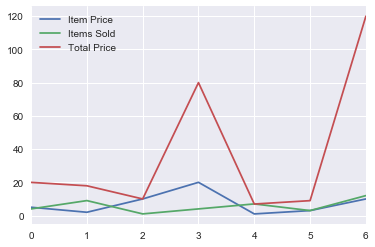

In [649]:
df.plot()

Scatter plots are just as easy. Just need to specify the `x` and `y` variables.

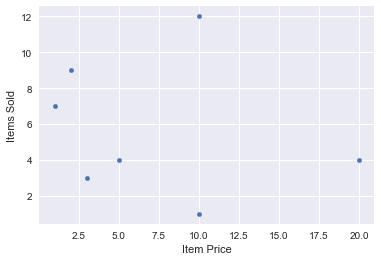

In [650]:
df.plot.scatter(x='Item Price', y='Items Sold')

Bar charts are simple as well in the same way.

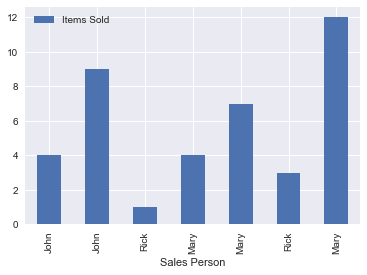

In [651]:
df.plot.bar(x='Sales Person', y='Items Sold')

Box plots are very informative. They show a box that has a line which indicates the median. The top box is the 25th percentile, and the bottom box is the 75th percentile of the data. The top line is the max value, while the bottom line is the minimum value. If there are any outliers that are way outside of this data it is marked by a circle.

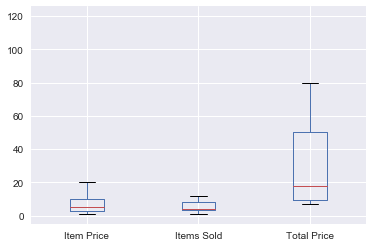

In [652]:
df.plot.box()

There's also a [Kernel Density](https://datavizcatalogue.com/methods/density_plot.html) plot. Can also use the `df.plot.kde()` method to get the same plot.

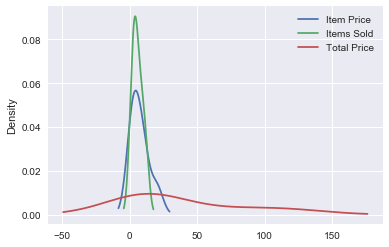

In [653]:
df.plot.density()

We can also plot on a single column, by selecting it by name from the data frame.

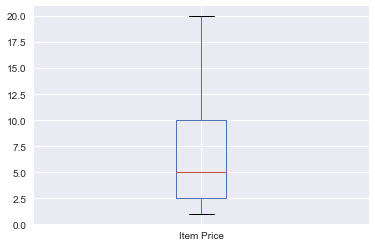

In [654]:
df["Item Price"].plot.box()

Grouped data frames can also be plotted.

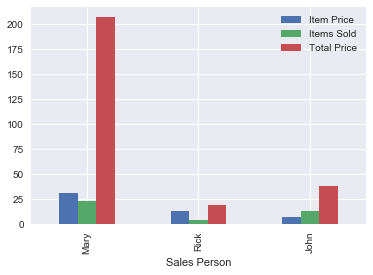

In [655]:
df.groupby("Sales Person").sum().sort_values("Item Price", ascending=False).plot(kind='bar')

### Plot Customization

We can customize our plots to make them easier to read and understand.

One simple, yet effective, thing to do is to add a title and name your axes.

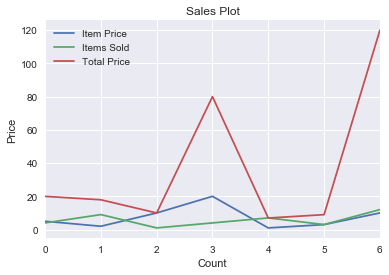

In [656]:
plot = df.plot(title='Sales Plot')
plot.set_xlabel('Count')
plot.set_ylabel('Price')

We can change colors of our plots.

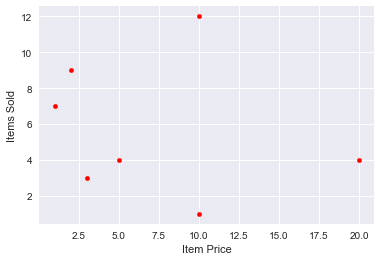

In [657]:
df.plot.scatter(x='Item Price', y='Items Sold', c='red')